In [1]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import skimage
import skimage.color
import skimage.io
import skimage.feature
import skimage.transform

In [3]:
#Load the data
data = pickle.load(open('pickle files/data_animals_head_20.pickle','rb'))

In [4]:
data['description']

'There are 20 classes and 2057 images. All the images are 80 x 80 (rgb)'

In [5]:
#split the data into independent and dependent
X = data['data'] #indepemdent
y = data['target'] #dependent

In [12]:
print(X)

[[[[196 214 188]
   [196 214 188]
   [196 214 188]
   ...
   [ 81  76  80]
   [ 81  76  80]
   [ 69  64  68]]

  [[196 214 188]
   [196 214 188]
   [196 215 187]
   ...
   [ 82  77  81]
   [ 83  78  82]
   [ 77  72  76]]

  [[193 213 185]
   [194 214 186]
   [194 214 186]
   ...
   [ 82  77  81]
   [ 81  76  80]
   [ 78  73  77]]

  ...

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 70  65  69]
   [ 65  60  64]
   [ 62  57  63]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 66  61  65]
   [ 62  57  61]
   [ 64  59  65]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 56  51  55]
   [ 79  74  78]
   [ 70  63  70]]]


 [[[  4   2   3]
   [  7   5   6]
   [  6   5   3]
   ...
   [ 42  31  25]
   [ 46  35  29]
   [ 45  32  26]]

  [[  7   5   6]
   [  5   4   2]
   [  2   1   0]
   ...
   [ 22  11   5]
   [ 43  32  26]
   [ 47  36  30]]

  [[  6   5   3]
   [  3   2   0]
   [  2   1   0]
   ...
   [ 33  24  17]
   [ 48  39  32]
   [ 54  45

In [16]:
print(y)

['bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'c

In [17]:
#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [18]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((1650, 80, 80, 3), (413, 80, 80, 3), 1650, 413)

fature extraction
        [Hog](www.facebook.com)

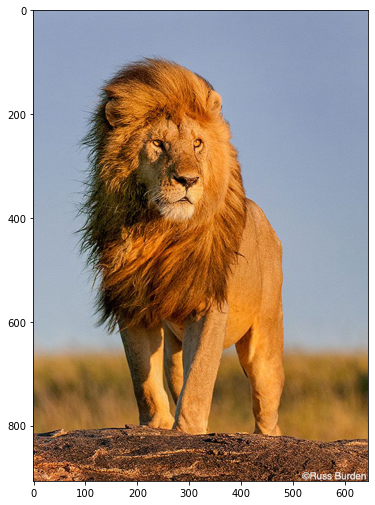

In [19]:
img = skimage.io.imread('lion.bmp')
plt.figure(figsize=(6,10))
plt.imshow(img)

In [20]:
#hog transform
img_re = skimage.transform.rescale(img,1/3).reshape((302,215))
gray = skimage.color.rgb2gray(img_re)
feature_vector, hog_img = skimage.feature.hog(gray,orientations=9,pixels_per_cell=(14,14),
                    cells_per_block=(2,2),visualize=True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_7664/4185959224.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray = skimage.color.rgb2gray(img_re)


In [21]:
len(feature_vector)

10080

In [22]:
gray.shape

(302, 215)

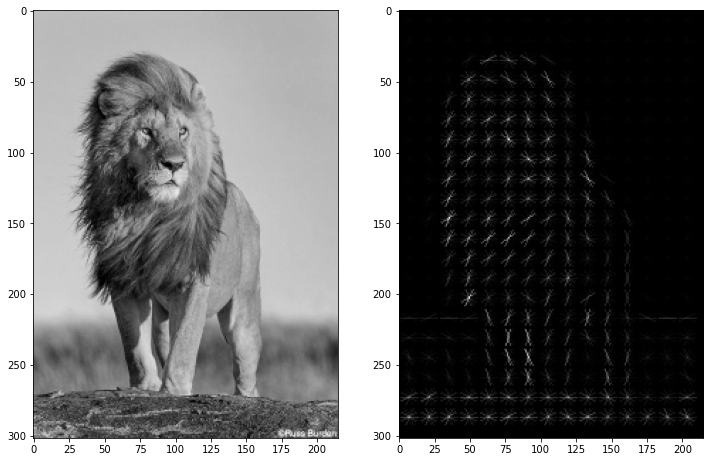

In [23]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap='gray')

##preprocessing
> grayscale  
> Hog(histogram oriented gradient)transform

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

In [25]:
class rgb2gray_transform(BaseEstimator, TransformerMixin):
    import skimage.color
    
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])

In [26]:
x_train.shape

(1650, 80, 80, 3)

In [27]:
rgb2grayobj = rgb2gray_transform()
x_train_gray = rgb2grayobj.fit_transform(x_train)

In [28]:
x_train_gray.shape

(1650, 80, 80)

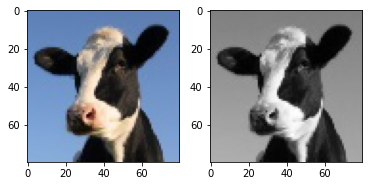

In [29]:
plt.subplot(1,2,1)
plt.imshow(x_train[10])
plt.subplot(1,2,2)
plt.imshow(x_train_gray[10],cmap='gray')

Hog transformation :-

In [30]:
class hogtransformer(BaseEstimator, TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8,8),cells_per_block=(3,3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features = skimage.feature.hog(img,orientations=self.orientations,
                                              pixels_per_cell = self.pixels_per_cell,
                                              cells_per_block=self.cells_per_block)
            return hog_features
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures

In [31]:
hogt = hogtransformer()

In [32]:
x_train_hog = hogt.fit_transform(x_train_gray)

In [33]:
x_train_hog.shape

(1650, 5184)

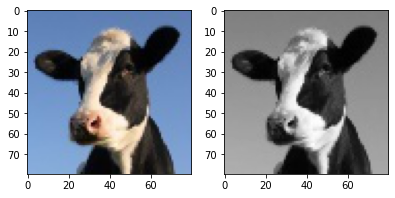

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(x_train[10])
plt.subplot(1,3,2)
plt.imshow(x_train_gray[10],cmap='gray')

Trainig Machine Learning Model

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [36]:
model_sgd = SGDClassifier(loss='hinge',learning_rate='adaptive',
                         early_stopping=True,eta0=0.1)

In [37]:
x_train.shape,x_test.shape

((1650, 80, 80, 3), (413, 80, 80, 3))

In [38]:
grayify = rgb2gray_transform()
hogify = hogtransformer()
scalify = StandardScaler()

In [39]:
#pipline
#step 1 : convert into grayscale
x_train_gray = grayify.fit_transform(x_train)
#step 2 : extract the features
x_train_hog = hogify.fit_transform(x_train_gray)
#step 3 : Normalization
x_train_scale = scalify.fit_transform(x_train_hog)
#step 4 : mschine learning
model_sgd.fit(x_train_scale, y_train)

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive')

In [40]:
x_test_gray = grayify.fit_transform(x_test)
#step2 : extraction the feature
x_test_hog = hogify.fit_transform(x_test_gray)
#step 3 : Normalization
x_test_scale = scalify.transform(x_test_hog)

y_pred_test = model_sgd.predict(x_test_scale)

In [41]:
y_pred_test

array(['wolf', 'deer', 'cat', 'panda', 'mouse', 'panda', 'eagle', 'human',
       'panda', 'human', 'cat', 'human', 'rabbit', 'monkey', 'dog',
       'elephant', 'pigeon', 'deer', 'monkey', 'eagle', 'elephant',
       'panda', 'pigeon', 'cat', 'deer', 'duck', 'rabbit', 'lion', 'wolf',
       'elephant', 'cat', 'pigeon', 'tiger', 'duck', 'mouse', 'mouse',
       'monkey', 'cat', 'sheep', 'deer', 'deer', 'tiger', 'human',
       'pigeon', 'pigeon', 'tiger', 'pigeon', 'sheep', 'cow', 'eagle',
       'wolf', 'panda', 'human', 'lion', 'sheep', 'eagle', 'tiger',
       'eagle', 'natural', 'sheep', 'eagle', 'lion', 'dog', 'panda',
       'duck', 'pigeon', 'human', 'rabbit', 'lion', 'sheep', 'rabbit',
       'chicken', 'cow', 'human', 'natural', 'panda', 'deer', 'cat',
       'elephant', 'lion', 'cow', 'cat', 'panda', 'elephant', 'pigeon',
       'human', 'tiger', 'human', 'cat', 'duck', 'lion', 'panda',
       'rabbit', 'elephant', 'tiger', 'cow', 'mouse', 'cat', 'bear',
       'cow', 'panda'

### Model Evolution

In [42]:
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.250000,0.150000,0.187500,20.000000
cat,0.617647,0.656250,0.636364,32.000000
chicken,0.769231,0.500000,0.606061,20.000000
cow,0.400000,0.285714,0.333333,21.000000
deer,0.538462,0.666667,0.595745,21.000000
dog,0.296296,0.307692,0.301887,26.000000
duck,0.480000,0.571429,0.521739,21.000000
eagle,0.578947,0.550000,0.564103,20.000000
elephant,0.692308,0.450000,0.545455,20.000000
human,0.606061,0.952381,0.740741,21.000000


In [43]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.4935026323939301

Pipeline model

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
model_pipe = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=8,
                                  pixels_per_cell =(10,10),cells_per_block=(3,3))),
    ('scaler',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',
                        early_stopping=True,eta0=0.1))
])

In [46]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('grascale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(orientations=8, pixels_per_cell=(10, 10))),
                ('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(early_stopping=True, eta0=0.1,
                               learning_rate='adaptive'))])

In [47]:
y_pred_test = model_pipe.predict(x_test)

In [48]:
y_pred_test

array(['dog', 'deer', 'cat', 'panda', 'mouse', 'panda', 'eagle', 'human',
       'tiger', 'human', 'wolf', 'wolf', 'rabbit', 'monkey', 'rabbit',
       'cat', 'pigeon', 'mouse', 'lion', 'eagle', 'elephant', 'panda',
       'elephant', 'bear', 'sheep', 'duck', 'rabbit', 'sheep', 'wolf',
       'elephant', 'monkey', 'dog', 'tiger', 'mouse', 'mouse', 'deer',
       'wolf', 'cat', 'sheep', 'sheep', 'deer', 'tiger', 'human',
       'pigeon', 'pigeon', 'tiger', 'pigeon', 'sheep', 'mouse', 'monkey',
       'lion', 'panda', 'monkey', 'cat', 'lion', 'panda', 'cow', 'rabbit',
       'duck', 'sheep', 'eagle', 'wolf', 'dog', 'panda', 'tiger', 'mouse',
       'human', 'sheep', 'sheep', 'pigeon', 'cow', 'chicken', 'cow',
       'monkey', 'tiger', 'panda', 'chicken', 'cow', 'elephant', 'monkey',
       'sheep', 'cat', 'panda', 'elephant', 'pigeon', 'human', 'tiger',
       'monkey', 'cat', 'chicken', 'pigeon', 'cat', 'rabbit', 'elephant',
       'tiger', 'dog', 'cat', 'cat', 'human', 'cow', 'panda', 

In [49]:
cr = pd.DataFrame(sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

,precision,recall,f1-score,support
bear,0.562500,0.450000,0.500000,20.000000
cat,0.552632,0.656250,0.600000,32.000000
chicken,0.785714,0.550000,0.647059,20.000000
cow,0.533333,0.380952,0.444444,21.000000
deer,0.652174,0.714286,0.681818,21.000000
dog,0.444444,0.461538,0.452830,26.000000
duck,0.588235,0.476190,0.526316,21.000000
eagle,0.647059,0.550000,0.594595,20.000000
elephant,0.600000,0.600000,0.600000,20.000000
human,0.826087,0.904762,0.863636,21.000000


## Grid Search
. HyperParrameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
estimator = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hogtransformer()),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier())
])

In [52]:
param_grid = [
    {
        'hogtransform__orientations' : [7.8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate': ['optimal']  
    },
    {
        'hogtransform__orientations' : [7.8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' :['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate': ['adaptive'],
        'sgd__eta0':[0.001,0.01]
    }
]

In [53]:
model_grid = GridSearchCV(estimator,
                         param_grid=param_grid,scoring='accuracy',n_jobs=1,
                          cv=3,verbose=2)

In [54]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   8.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   8.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   7.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   8.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform_

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   7.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   4.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransf

D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  10.4s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  15.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  12.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  11.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform_

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron; total time=  11.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   7.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   7.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   6.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   6.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransf

D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  12.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  11.7s
[

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   6.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; tot

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  12.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  12.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  10.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  11.7s

D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.1s

D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.1s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s


D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\program_files\anaconda\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "D:\program_files\anaconda\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   0.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  16.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  21.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  21.4s
[CV

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   8.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   8.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   9.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  13.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  14.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  14.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  14.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  14.7s
[

D:\program_files\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.69030303 0.68666667 0.68606061
 0.71636364 0.72181818 0.71939394 0.68787879 0.68484848 0.68060606
 0.68969697 0.68484848 0.68242424 0.7230303  0.72121212 0.71636364
 0.68727273 0.67393939 0.68              nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.66787879 0.6630303  0.6630303  0.72424242 0.71515152 0.71030303
 0.67939394 0.68121212 0.68424242 0.67272727 0.66787879 0.65939394
 0.71333333 0.72121212 0.70909091 0.66606061 0.67333333 0.6769697
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.52606061 0.44484848 0.48484848 0.49515152 0.494545

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('grascale', rgb2gray_transform()),
                                       ('hogtransform', hogtransformer()),
                                       ('scale', StandardScaler()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=1,
             param_grid=[{'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7.8, 9, 10],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9)],
                          'sgd__learning_rate': ['optimal'],
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'perceptron']},
                         {'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7.8, 9, 10],
                          'hogtransform__pixels_per

In [55]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'grascale', 'hogtransform', 'scale', 'sgd', 'hogtransform__cells_per_block', 'hogtransform__orientations', 'hogtransform__pixels_per_cell', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'sgd__alpha', 'sgd__average', 'sgd__class_weight', 'sgd__early_stopping', 'sgd__epsilon', 'sgd__eta0', 'sgd__fit_intercept', 'sgd__l1_ratio', 'sgd__learning_rate', 'sgd__loss', 'sgd__max_iter', 'sgd__n_iter_no_change', 'sgd__n_jobs', 'sgd__penalty', 'sgd__power_t', 'sgd__random_state', 'sgd__shuffle', 'sgd__tol', 'sgd__validation_fraction', 'sgd__verbose', 'sgd__warm_start'])

In [56]:
model_grid.best_params_

{'hogtransform__cells_per_block': (3, 3),
 'hogtransform__orientations': 9,
 'hogtransform__pixels_per_cell': (8, 8),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

In [57]:
model_grid.best_score_

0.7242424242424242

In [58]:
model_best = model_grid.best_estimator_

In [59]:
y_pred = model_best.predict(x_test)

In [60]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

D:\program_files\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\program_files\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\program_files\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.750000,0.600000,0.666667,20.000000
cat,0.725000,0.906250,0.805556,32.000000
chicken,0.909091,0.500000,0.645161,20.000000
cow,0.588235,0.476190,0.526316,21.000000
deer,0.703704,0.904762,0.791667,21.000000
dog,0.629630,0.653846,0.641509,26.000000
duck,0.888889,0.761905,0.820513,21.000000
eagle,0.681818,0.750000,0.714286,20.000000
elephant,0.695652,0.800000,0.744186,20.000000
human,1.000000,1.000000,1.000000,21.000000


In [61]:
#save the model
pickle.dump(model_best,open('pickle files/dsa_model_best.pickle','wb'))

## make pipeline
{'hogtransform__cells_per_block': (3, 3),
 'hogtransform__orientations': 9,
 'hogtransform__pixels_per_cell': (8, 8),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

In [62]:
from sklearn.pipeline import make_pipeline

In [63]:
 pipeline1 = make_pipeline(rgb2gray_transform(),
    hogtransformer(orientations=10,
                   pixels_per_cell=(8,8),
                   cells_per_block=(2,2)))

In [64]:
feature_vector = pipeline1.fit_transform(x_train)

In [65]:
#standard scaler
scalar = StandardScaler()
transformed_xtrain = scalar.fit_transform(feature_vector)

In [66]:
model = SGDClassifier(learning_rate='optimal',loss='hinge',alpha=0.01,early_stopping=True)

In [67]:
model.fit(transformed_xtrain,y_train)

SGDClassifier(alpha=0.01, early_stopping=True)

In [68]:
#evaluating model
feature_vector = pipeline1.fit_transform(x_test)
transformed_x = scalar.transform(feature_vector)
y_pred_test = model.predict(transformed_x)

In [69]:
cr = pd.DataFrame(metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

D:\program_files\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\program_files\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\program_files\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.764706,0.650000,0.702703,20.000000
cat,0.729730,0.843750,0.782609,32.000000
chicken,0.928571,0.650000,0.764706,20.000000
cow,0.600000,0.428571,0.500000,21.000000
deer,0.740741,0.952381,0.833333,21.000000
dog,0.526316,0.769231,0.625000,26.000000
duck,0.882353,0.714286,0.789474,21.000000
eagle,0.750000,0.750000,0.750000,20.000000
elephant,0.761905,0.800000,0.780488,20.000000
human,0.952381,0.952381,0.952381,21.000000


In [70]:
#save models for flask app
pickle.dump(model,open('pickle files/dsa_image_classification_sgd.pickle','wb'))

In [71]:
pickle.dump(scalar,open('pickle files/dsa_scaler.pickle','wb'))